In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [33]:
full = DirHistory.load('data/history/None.pkl')
medium = DirHistory.load('data/history/Medium.pkl')
simple = DirHistory.load('data/history/Simple.pkl')

## Simple Model Exploration

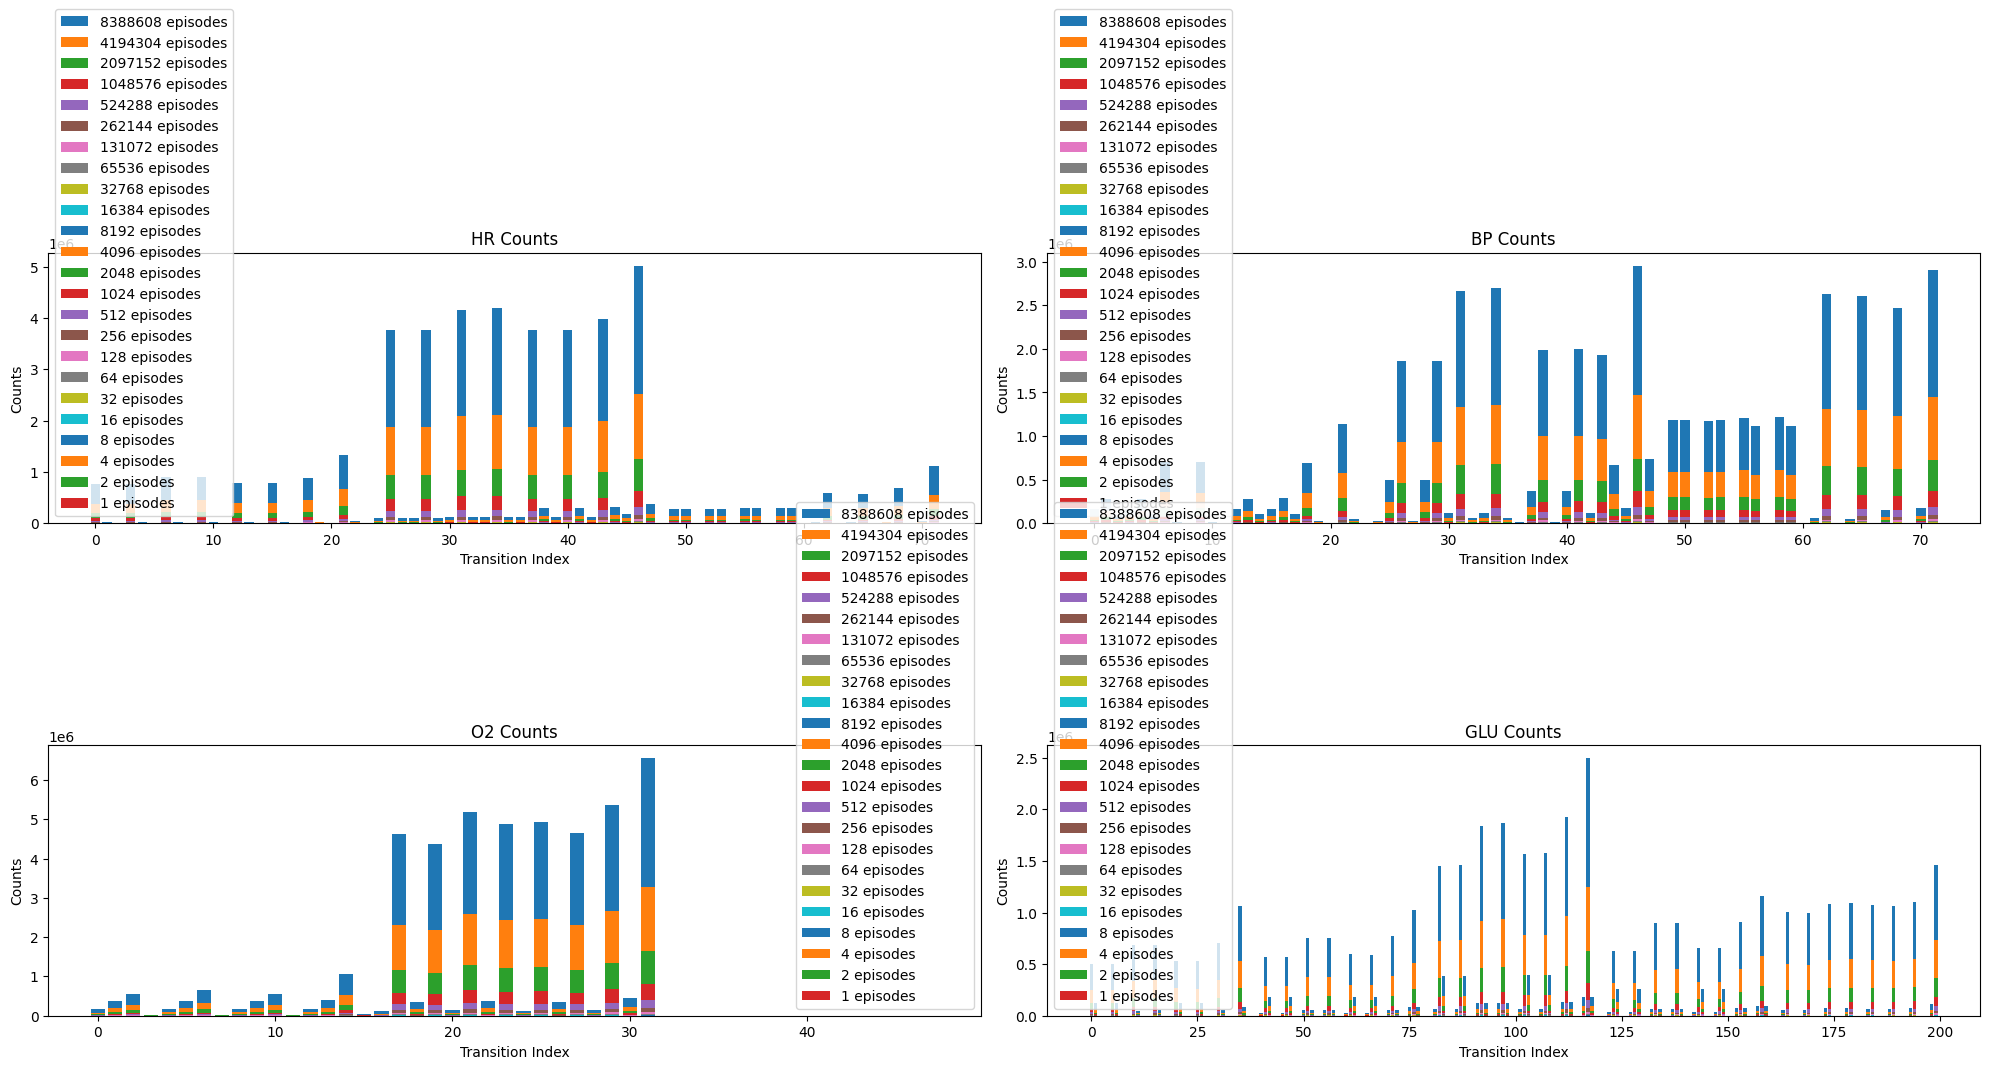

In [3]:
state_counts = simple.state_counts
# Create subplots in a 2x2 grid
vital_signs = ['HR', 'BP', 'O2', 'GLU']
plt.figure(figsize=(20, 10))
for idx, vital_sign in enumerate(vital_signs):
    plt.subplot(2, 2, idx + 1)  # Create a subplot in a 2x2 grid
    for i in reversed(state_counts.keys()):
        counts = list(state_counts[i][idx].values())  # Extract the counts for the vital sign
        plt.bar(range(len(counts)), counts, label=f"{i} episodes")  # Plot the counts
    
    plt.xlabel('Transition Index')
    plt.ylabel('Counts')
    plt.title(f'{vital_sign} Counts')
    plt.legend()

plt.tight_layout()  # Adjust spacing between plots
plt.show()

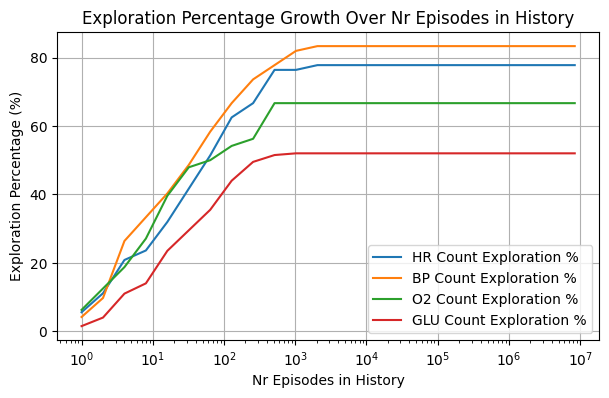

In [4]:
exploration_data = {vs: [] for vs in ['HR', 'BP', 'O2', 'GLU']}
iterations = list(simple.state_counts.keys()) 

for iteration in iterations:
    for i, vs in enumerate(['HR', 'BP', 'O2', 'GLU']):
        flat = np.array(list(simple.state_counts[iteration][i].values()))
        explored_percentage = len(flat[flat > 1]) / len(flat) * 100 
        exploration_data[vs].append(explored_percentage)


plt.figure(figsize=(7, 4))

for vs in ['HR', 'BP', 'O2', 'GLU']:
    plt.plot(iterations, exploration_data[vs], label=f"{vs} Count Exploration %")

plt.xlabel('Nr Episodes in History')
plt.ylabel('Exploration Percentage (%)')
plt.title('Exploration Percentage Growth Over Nr Episodes in History')
plt.legend()
plt.xscale('log', base=10)
plt.grid(True)

plt.show()


## Medium Model Exploration

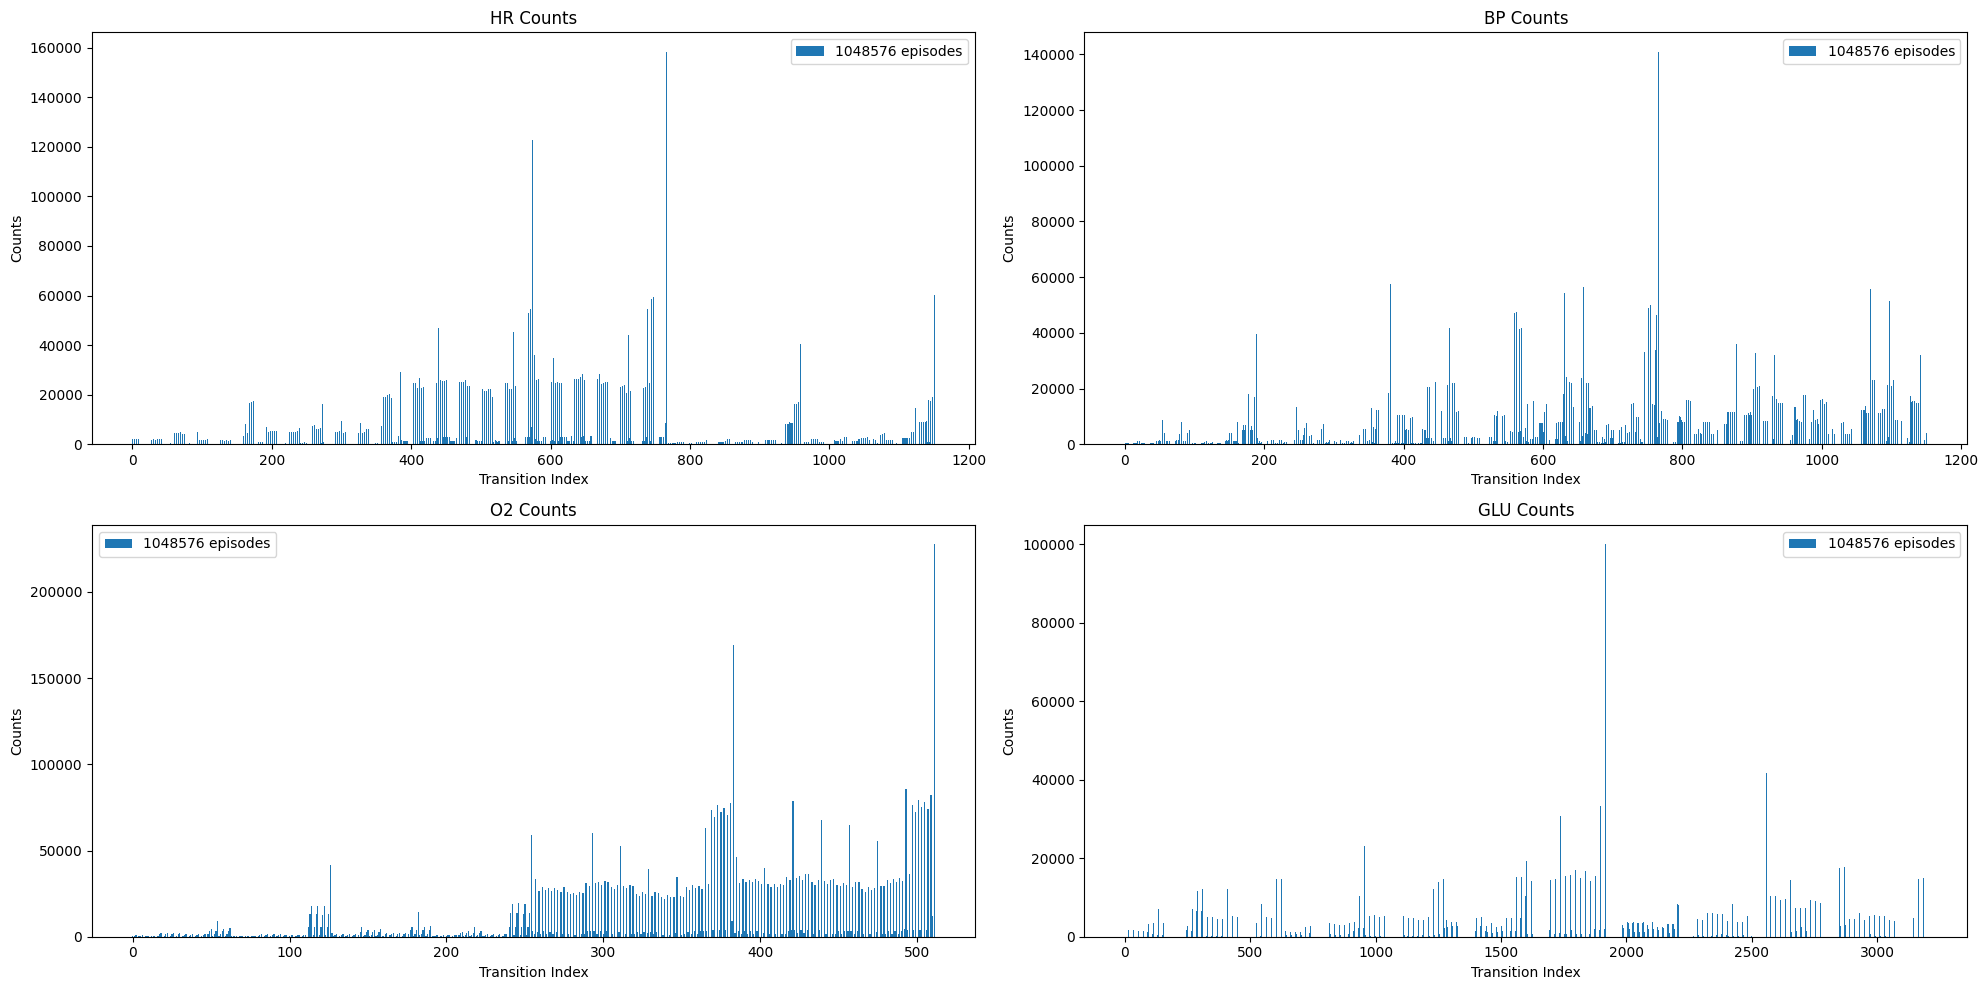

In [123]:
state_counts = medium.state_counts
# Create subplots in a 2x2 grid
vital_signs = ['HR', 'BP', 'O2', 'GLU']
last = list(state_counts.keys())[-1]
plt.figure(figsize=(20, 10))
for idx, vital_sign in enumerate(vital_signs):
    plt.subplot(2, 2, idx + 1)  # Create a subplot in a 2x2 grid
    # for i in reversed(state_counts.keys()):
    counts = list(medium.state_counts[last][idx].values())  # Extract the counts for the vital sign
    plt.bar(range(len(counts)), counts, label=f"{last} episodes")  # Plot the counts
    
    plt.xlabel('Transition Index')
    plt.ylabel('Counts')
    plt.title(f'{vital_sign} Counts')
    plt.legend()

plt.tight_layout()  # Adjust spacing between plots
plt.show()

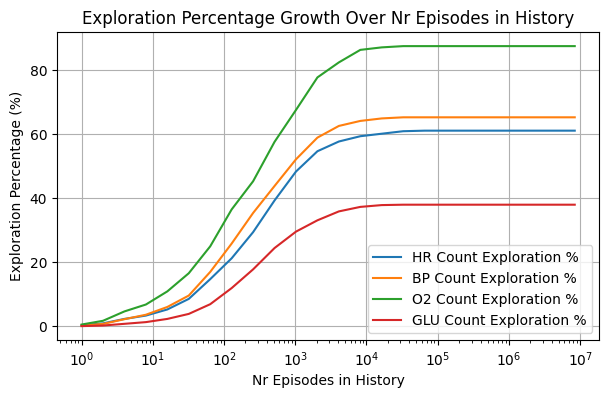

In [5]:
exploration_data = {vs: [] for vs in ['HR', 'BP', 'O2', 'GLU']}
iterations = list(medium.state_counts.keys()) 

for iteration in iterations:
    for i, vs in enumerate(['HR', 'BP', 'O2', 'GLU']):
        flat = np.array(list(medium.state_counts[iteration][i].values()))
        explored_percentage = len(flat[flat > 1]) / len(flat) * 100 
        exploration_data[vs].append(explored_percentage)


plt.figure(figsize=(7, 4))

for vs in ['HR', 'BP', 'O2', 'GLU']:
    plt.plot(iterations, exploration_data[vs], label=f"{vs} Count Exploration %")

plt.xlabel('Nr Episodes in History')
plt.ylabel('Exploration Percentage (%)')
plt.title('Exploration Percentage Growth Over Nr Episodes in History')
plt.legend()
plt.xscale('log', base=10)
plt.grid(True)

plt.show()


## Full Transition Model Exploration

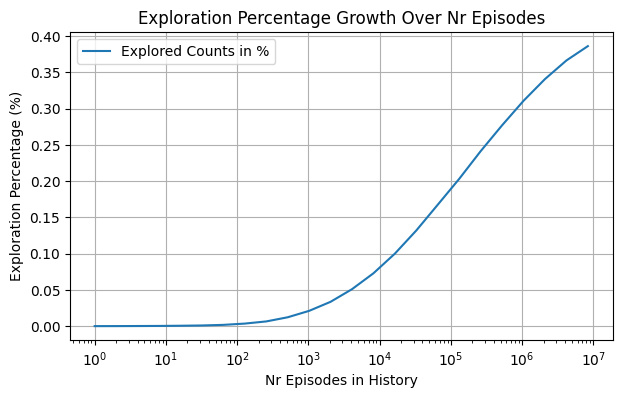

In [6]:
exploration_data = []
iterations = list(full.state_counts.keys()) 

for iteration in iterations:
    flat = full.state_counts[iteration].flatten()
    explored_percentage = len(flat[flat > 1]) / len(flat) * 100 
    exploration_data.append(explored_percentage)

plt.figure(figsize=(7, 4))

plt.plot(iterations, exploration_data, label=f"Explored Counts in %")

plt.xlabel('Nr Episodes in History')
plt.ylabel('Exploration Percentage (%)')
plt.title('Exploration Percentage Growth Over Nr Episodes')
plt.legend()
plt.grid(True)
plt.xscale('log', base=10)

plt.show()


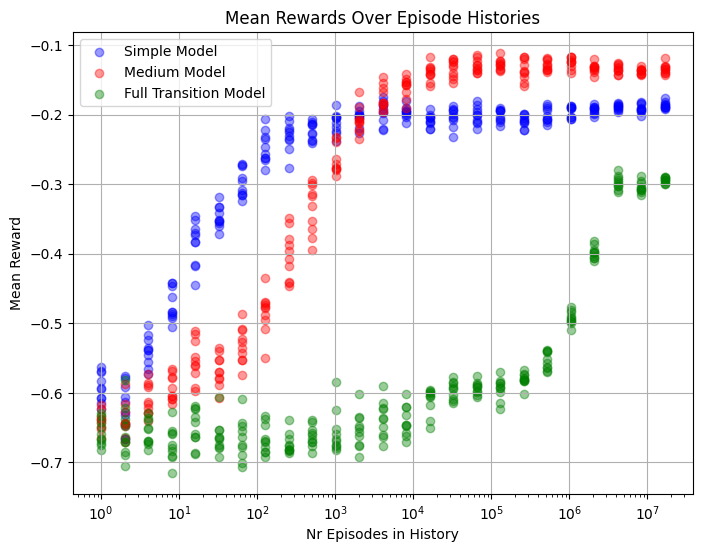

In [34]:
x_simple = [] 
x_medium = [] 
x_full = [] 
y_simple = [] 
y_medium = [] 
y_full = [] 

for iteration, rewards in simple.mean_rewards.items():
    x_simple.extend([iteration] * len(rewards))  
    y_simple.extend(rewards)  
for iteration, rewards in medium.mean_rewards.items():
    x_medium.extend([iteration] * len(rewards))  
    y_medium.extend(rewards)  
for iteration, rewards in full.mean_rewards.items():
    x_full.extend([iteration] * len(rewards))  
    y_full.extend(rewards)  

plt.figure(figsize=(8, 6))
plt.scatter(x_simple, y_simple, color='blue', label='Simple Model', alpha=0.4) 
plt.scatter(x_medium, y_medium, color='red', label='Medium Model', alpha=0.4) 
plt.scatter(x_full, y_full, color='green', label='Full Transition Model', alpha=0.4) 

# Add labels, title, and legend
plt.xlabel('Nr Episodes in History')
plt.ylabel('Mean Reward')
plt.title('Mean Rewards Over Episode Histories')
plt.xscale('log', base=10)
plt.legend()
# plt.ylim(-0.75, -0.05)
plt.grid(True)

# Show the plot
plt.show()

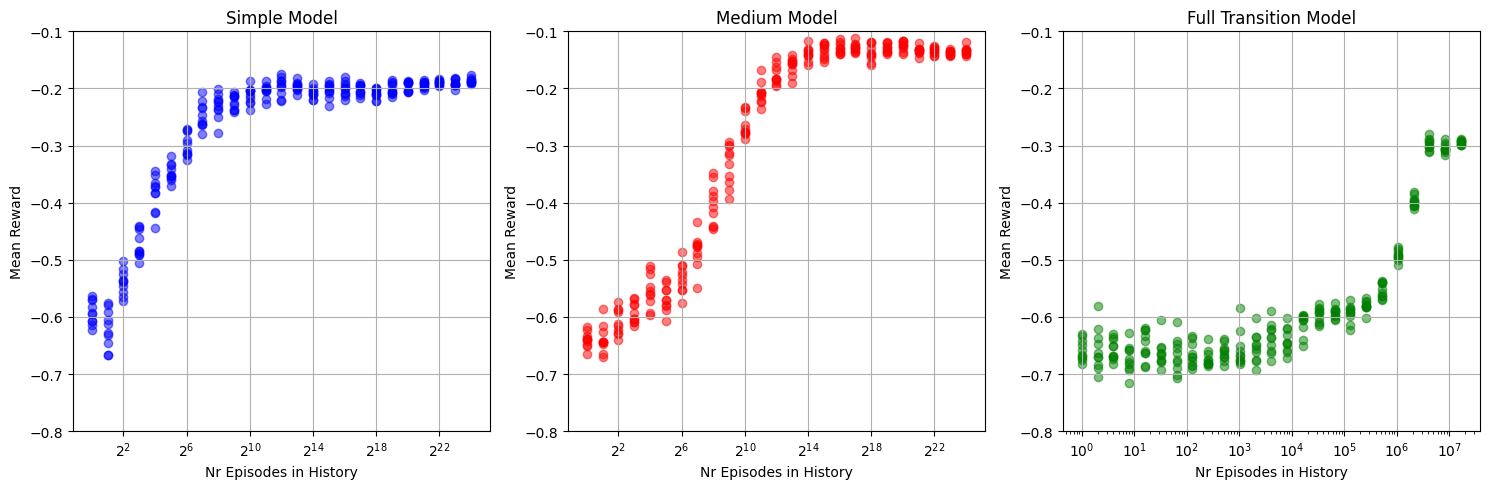

In [32]:
x_simple = [] 
x_medium = [] 
x_full = [] 
y_simple = [] 
y_medium = [] 
y_full = [] 

for iteration, rewards in simple.mean_rewards.items():
    x_simple.extend([iteration] * len(rewards))  
    y_simple.extend(rewards)  
for iteration, rewards in medium.mean_rewards.items():
    x_medium.extend([iteration] * len(rewards))  
    y_medium.extend(rewards)  
for iteration, rewards in full.mean_rewards.items():
    x_full.extend([iteration] * len(rewards))  
    y_full.extend(rewards)  

# Assuming x_simple, x_medium, x_full, y_simple, y_medium, y_full are defined


plt.figure(figsize=(15, 5))

# Plot for Simple Model
plt.subplot(1, 3, 1)  # 3 rows, 1 column, 1st plot
plt.scatter(x_simple, y_simple, color='blue', alpha=0.5)
plt.xlabel('Nr Episodes in History')
plt.ylabel('Mean Reward')
plt.title('Simple Model')
plt.xscale('log', base=2)
plt.ylim(-0.8, -0.1)  # Set y-axis limits
plt.grid(True)

# Plot for Medium Model
plt.subplot(1, 3, 2)  # 3 rows, 1 column, 2nd plot
plt.scatter(x_medium, y_medium, color='red', alpha=0.5)
plt.xlabel('Nr Episodes in History')
plt.ylabel('Mean Reward')
plt.title('Medium Model')
plt.xscale('log', base=2)
plt.ylim(-0.8, -0.1)  # Set y-axis limits
plt.grid(True)

# Plot for Full Model
plt.subplot(1, 3, 3)  # 3 rows, 1 column, 3rd plot
plt.scatter(x_full, y_full, color='green', alpha=0.5)
plt.xlabel('Nr Episodes in History')
plt.ylabel('Mean Reward')
plt.title('Full Transition Model')
plt.xscale('log', base=10)
plt.ylim(-0.8, -0.1)  # Set y-axis limits
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
